In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# To read directly the CSV from the John Hopkins github repo
import io
import requests

# Set seaborn style and fonts
sns.set_style("whitegrid")
sns.set(font_scale=3, rc={'lines.linewidth': 3})

In [3]:
# Obtain the data from the John Hopkins github repo
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
s = requests.get(url).content

# df = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Columns: 179 entries, UID to 7/7/20
dtypes: float64(3), int64(170), object(6)
memory usage: 4.5+ MB


In [5]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,247,253,257,267,280,280,280,280,301,303
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,30,30,30,30,31,31,31,31,31,31
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,7189,7250,7465,7537,7608,7683,7787,7916,8585,8714
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,81,81,81,90,92,98,111,111,112,116


## Exploratory Data Analysis for Los Angeles

In [6]:
'Raleigh' in set(df['Admin2'])
df[df['Admin2']=='Wake']
# df[df['Province_State']=='North Carolina'].tail(n=20)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
1986,84037183,US,USA,840,37183.0,Wake,North Carolina,US,35.788793,-78.652492,...,4816,5009,5178,5298,5453,5651,5810,5980,6231,6299


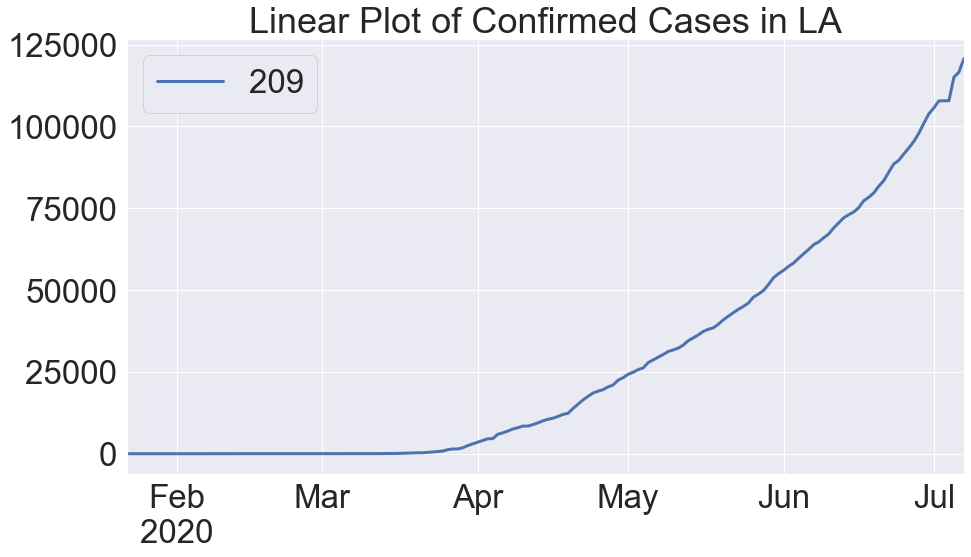

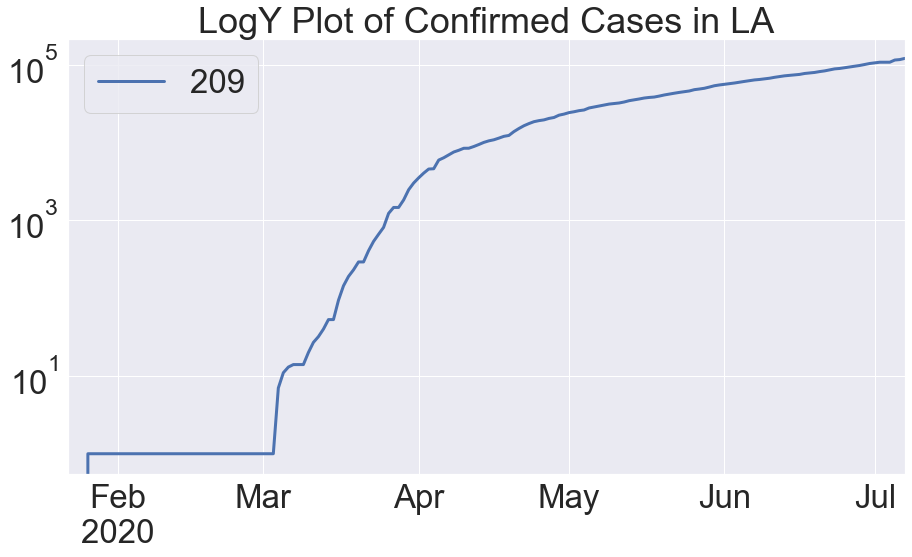

In [7]:
# df_LA = df[df['Admin2']=='Wake']
df_LA = df[df['Admin2']=='Los Angeles']
df_LA = df_LA.transpose()
df_LA = df_LA.drop(labels=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
df_LA.index = pd.to_datetime(df_LA.index)
df_LA.head()

fig1 = df_LA.plot(figsize=(15,8), title='Linear Plot of Confirmed Cases in LA', kind='line')

fig2 = df_LA.plot(figsize=(15,8), logy=True, title='LogY Plot of Confirmed Cases in LA')

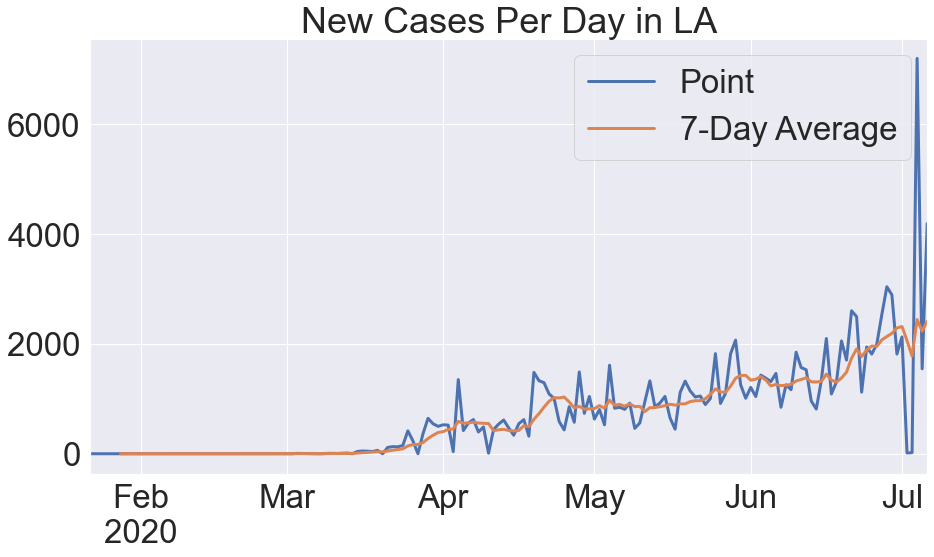

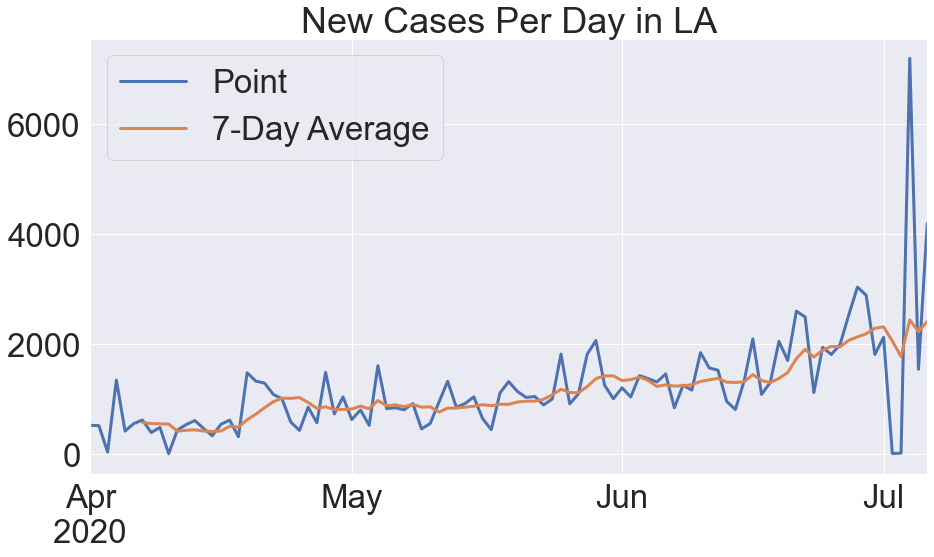

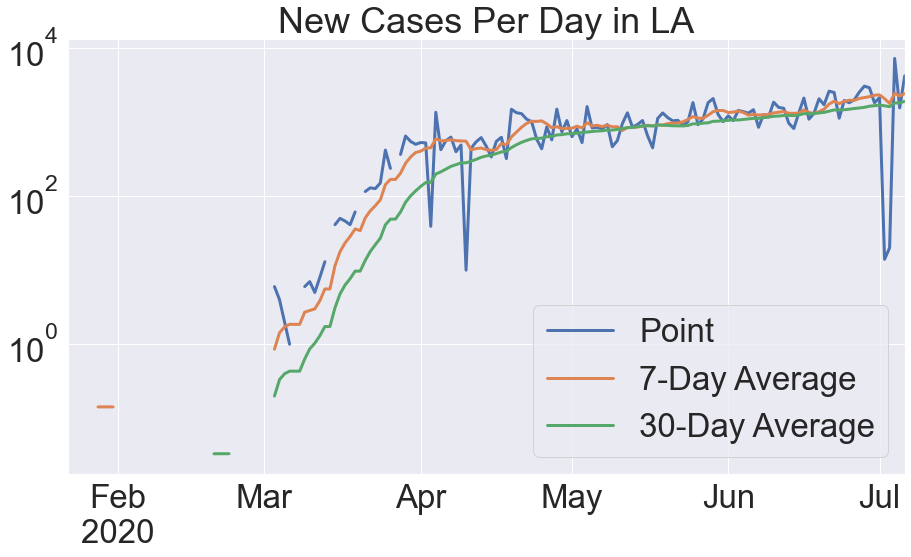

In [8]:
df_newcases_LA = df_LA[1:].values-df_LA[0:-1]
fig3 = df_newcases_LA.rename(columns={209: 'Point'}).plot(kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig3 = df_newcases_LA.rolling(window=7).mean().rename(columns={209: '7-Day Average'}).plot(ax=fig3)

fig5 = df_newcases_LA[df_newcases_LA.index>pd.to_datetime('03-31-20')].rename(columns={209: 'Point'}).plot(kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig5 = df_newcases_LA[df_newcases_LA.index>pd.to_datetime('03-31-20')].rolling(window=7).mean().rename(columns={209: '7-Day Average'}).plot(ax=fig5)


# Drop the ones that have zeros to avoid problems in the log plot
indexVal = df_newcases_LA[ df_newcases_LA.values == 0 ].index
df_newcases_LA_tmp1 = df_newcases_LA.copy()
df_newcases_LA_tmp1.loc[indexVal] = np.NaN

df_newcases_LA_tmp2 = df_newcases_LA.rolling(window=7).mean()
indexVal = df_newcases_LA_tmp2[ df_newcases_LA_tmp2.values == 0 ].index
df_newcases_LA_tmp2.loc[indexVal] = np.NaN

df_newcases_LA_tmp3 = df_newcases_LA.rolling(window=30).mean()
indexVal = df_newcases_LA_tmp2[ df_newcases_LA_tmp3.values == 0 ].index
df_newcases_LA_tmp3.loc[indexVal] = np.NaN

fig4 = df_newcases_LA_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig4 = df_newcases_LA_tmp2.rename(columns={209: '7-Day Average'}).plot(logy=True, ax=fig4)
fig4 = df_newcases_LA_tmp3.rename(columns={209: '30-Day Average'}).plot(logy=True, ax=fig4)

## Exploratory Data Analysis by State

In [9]:
df_state = df.drop(labels=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).groupby(['Province_State']).sum()
df_state = df_state.transpose()
df_state.index = pd.to_datetime(df_state.index)
df_state.tail()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-07-03,41865,1060,0,91872,22622,250514,33595,46717,11923,49,...,48712,186799,23866,1236,98,64393,34778,3126,30317,1582
2020-07-04,42862,1107,0,94567,23209,252895,33849,46717,11996,49,...,50140,193958,24542,1238,111,65109,35247,3205,31055,1606
2020-07-05,43953,1134,0,98103,23814,264681,34048,46717,12128,49,...,51316,197421,24952,1249,111,65748,35898,3262,31577,1634
2020-07-06,44878,1162,0,101455,24253,271035,34240,46976,12293,49,...,52039,205642,25469,1251,112,66102,36985,3442,32061,1675
2020-07-07,45785,1180,0,105094,24512,284012,34647,47033,12414,49,...,53514,216026,26033,1254,116,66740,37420,3505,32556,1709


In [10]:
col_drop = df_state.columns[df_state.values[-1][:] < 50_000]
df_state = df_state.drop(columns=col_drop, axis=1)

df_state.tail()

Province_State,Arizona,California,Florida,Georgia,Illinois,Louisiana,Maryland,Massachusetts,Michigan,New Jersey,New York,North Carolina,Ohio,Pennsylvania,Tennessee,Texas,Virginia
2020-07-03,91872,250514,178594,90493,145750,63289,68961,109628,72175,172742,395872,70262,55257,93392,48712,186799,64393
2020-07-04,94567,252895,190052,93319,146612,63289,69341,109838,72581,173033,396598,71670,56183,93922,50140,193958,65109
2020-07-05,98103,264681,200111,95516,147251,65226,69632,109974,72941,173402,397131,72992,57150,94403,51316,197421,65748
2020-07-06,101455,271035,206447,97064,147865,66327,69904,110137,73267,173611,397649,74775,57956,95100,52039,205642,66102
2020-07-07,105094,284012,213794,100470,149574,68263,70396,110338,73900,173878,398237,76290,58904,95898,53514,216026,66740


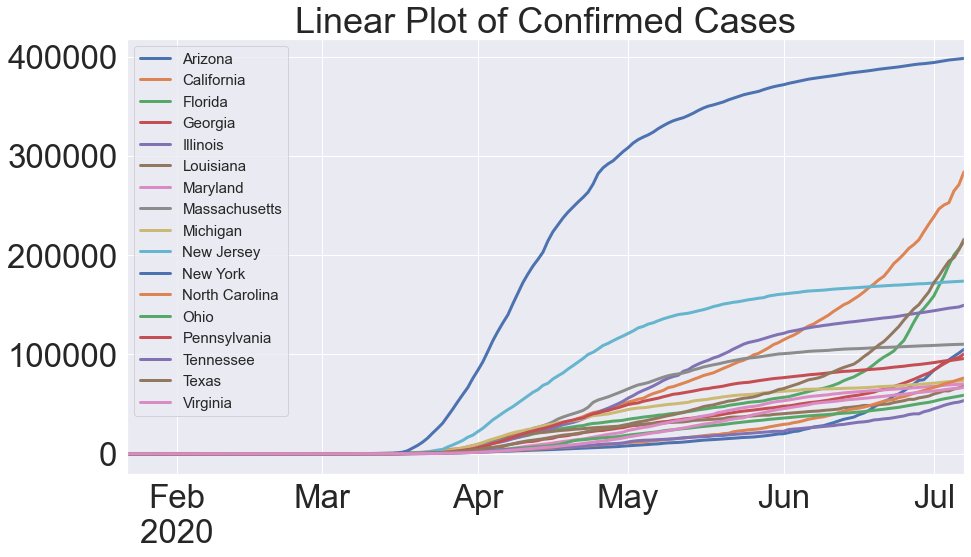

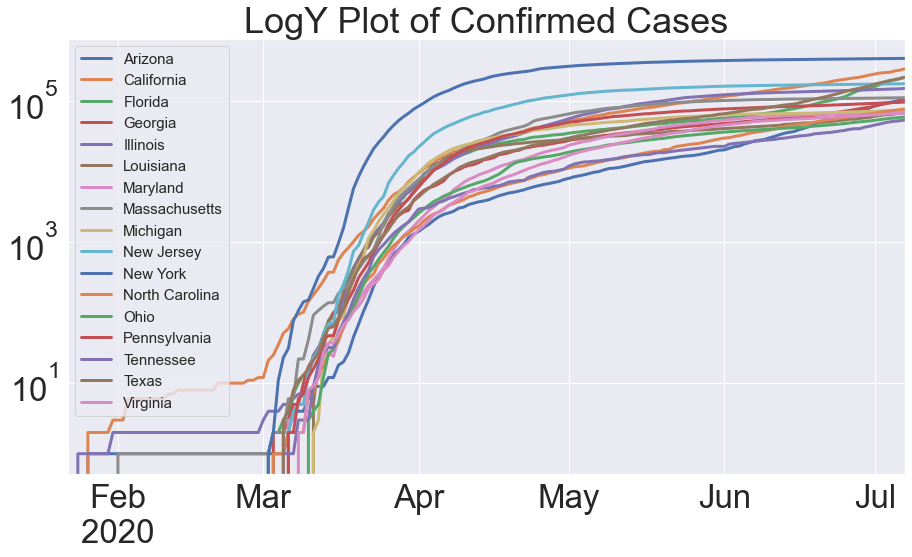

In [11]:
fig1 = df_state.plot(figsize=(15,8), title='Linear Plot of Confirmed Cases', kind='line')
plt.legend(fontsize=15);
fig2 = df_state.plot(figsize=(15,8), logy=True, title='LogY Plot of Confirmed Cases')
plt.legend(fontsize=15);

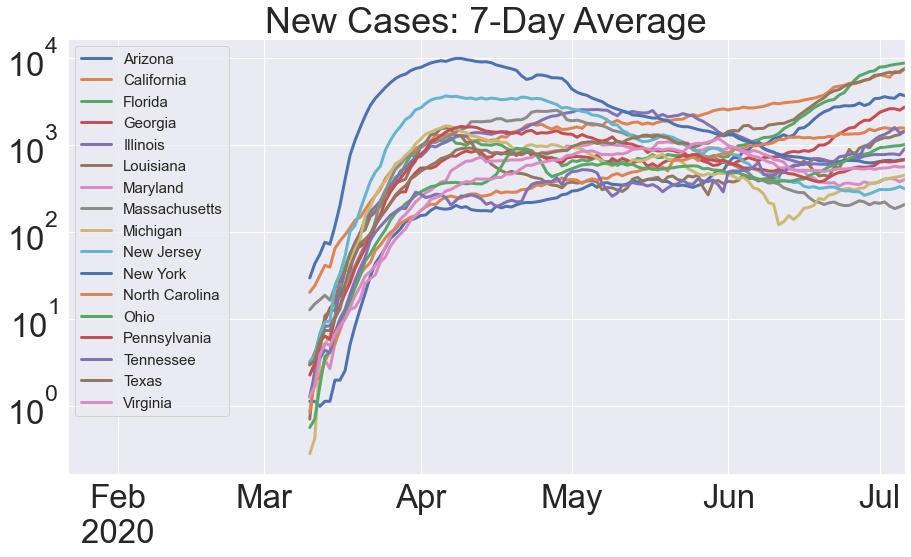

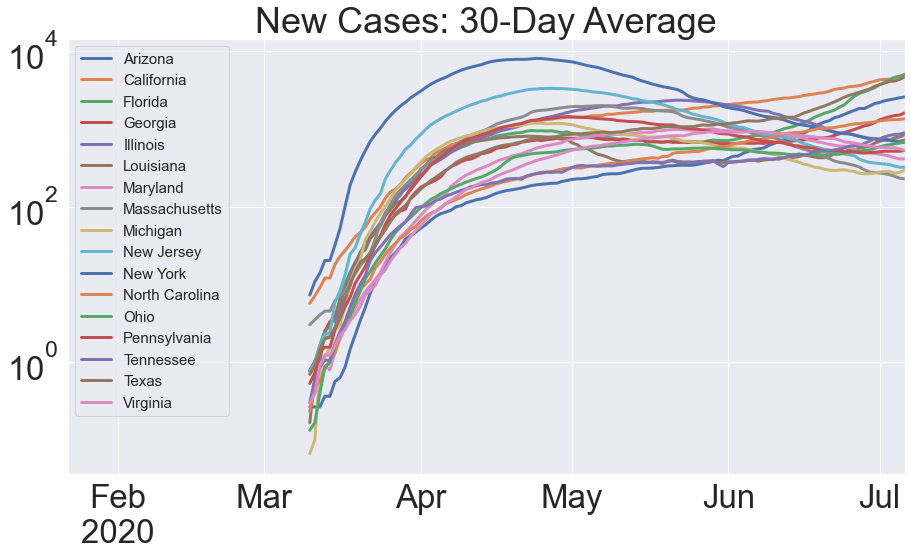

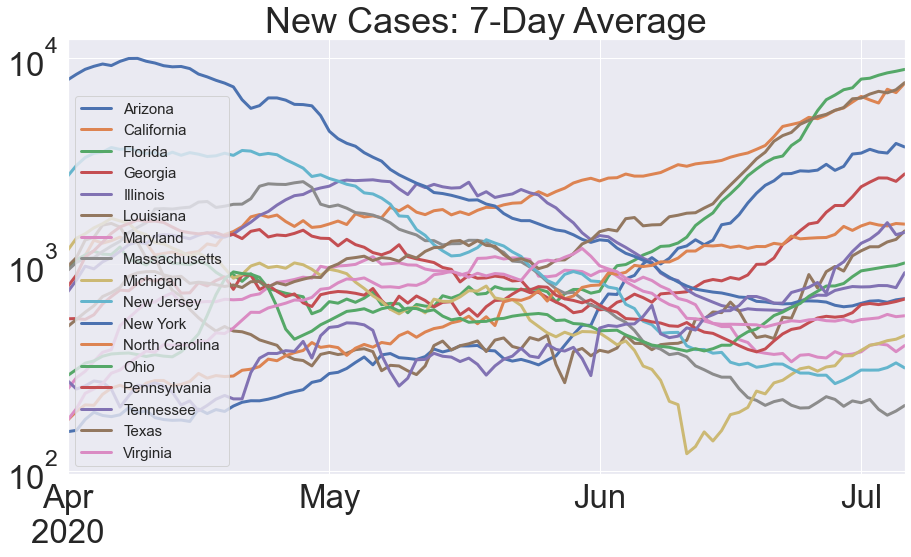

In [12]:
df_newcases_state = df_state[1:].values-df_state[0:-1]

# Drop the ones that have zeros to avoid problems in the log plot
indexVal = df_newcases_state[ df_newcases_state.values == 0 ].index
df_newcases_state_tmp1 = df_newcases_state.copy()
df_newcases_state_tmp1.loc[indexVal] = np.NaN

df_newcases_state_tmp2 = df_newcases_state.rolling(window=7).mean()
indexVal = df_newcases_state_tmp2[ df_newcases_state_tmp2.values == 0 ].index
df_newcases_state_tmp2.loc[indexVal] = np.NaN

df_newcases_state_tmp3 = df_newcases_state.rolling(window=30).mean()
indexVal = df_newcases_state_tmp2[ df_newcases_state_tmp3.values == 0 ].index
df_newcases_state_tmp3.loc[indexVal] = np.NaN

# fig4 = df_newcases_state_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in state')
fig4 = df_newcases_state_tmp2.plot(logy=True, figsize=(15,8), title='New Cases: 7-Day Average')
plt.legend(fontsize=15);
fig5 = df_newcases_state_tmp3.plot(logy=True, figsize=(15,8), title='New Cases: 30-Day Average')
plt.legend(fontsize=15);

# fig4 = df_newcases_state_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in state')
fig4 = df_newcases_state_tmp2[df_newcases_state_tmp2.index>pd.to_datetime('03-31-20')].plot(logy=True, figsize=(15,8), title='New Cases: 7-Day Average')
plt.legend(fontsize=15);